# D208: Predictive Modeling
Western Governors University
<br>Bailey Psuik 
<br>January 2024

### Part I: Research Question

**A1.  Research question**
<br>For this paper, data from a popular telecommunications company was analyzed. The company has collected data on its customers including demographic information, the services they receive, and customer account information in an effort to analyze their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics to help them reduce their churn rate. 
<br><br>To identify common characteristics of customers who discontinue service, this paper will use logistic regression to answer the question: **What factors contribute to churn?**


**A2. Goals**
<br>The goals of the data analysis are as follows:
* Perform logistic regression to determine what factors contribute most to churn.
* Make strategic recommendations to the company based on findings.

### Part II: Method Justification

**B1. Summary of assumptions**
<br>Logistic regression models assume the following (Statistics Solutions, n.d.):

* The dependent variable is binary for binary logistic regression; the dependent variable is ordinal for ordinal logistic regression.
* Observations are independent of each other.
* Little to no multicollinearity is present.
* Independent variables and log odds are linear.  

**B2. Tool benefits**
<br>Python was selected for this analysis due to two main benefits.
* Statistical modeling capabilities (Massaron & Boschetti, 2016): There are many useful packages in Python for aiding in the performance of statistical analysis and logistic regression, such as NumPy, Pandas, SKLearn, StatsModels, and others.
* Visualization capabilities: Two Python packages utilized in this project include matplotlib and seaborn, both of which are capable of producing helpful visualizations with simple syntax. Visualizing the data is an important step not only in cleaning and preparing data, but in examining the distribution of relevant variables through use of histograms, box plots, etc.

**B3. Appropriate technique**
<br>While linear regression analyzes numerical variables, logistic regression analyzes categorical variables. Logistic regression seeks to estimate the probability that an occurence belongs to a particular classificiation. The dependent variable being analyzed here is Churn, which is coded in the data set as a binary categorical variable, therefore binary logistic regression will be used.

**C1.  Data cleaning**
<br>Before this data set is analyzed, the data must be cleaned. Skipping this vital step could result in a faulty or misleading answer to the research question posed in section A1. Goals of the data cleaning process include: 
* Perform an initial inspection of the data to get the number of rows, columns, and data types
* Identify and treating duplicate values
* Convert categorical variables to numerical variables
* Identify and treating missing values
* Identify and treating outliers

<br>The steps used to clean the data are as follows: 
<br><br>Step 1: Perform an initial inspection of the data with the .info() function. 
* Outcome: The data contains 10,000 rows and 50 columns. All variables but one, InternetService, have 10,000 non-null values. Data types of each variable are logical.

<br>Step 2: Compute a sum of the number of total duplicates contained in the data set. Additionally, since 'Customer_id' is denoted as being a unique identifier, compute the sum of duplicates in this column.
* Outcome: No duplicates were found, so no treatment was needed.

<br>Step 3: Re-express ordinal categorical variables as numerical variables.
* Outcome: 14 ordinal categorical variables had their values replaced with numerical values to prepare this data set for analysis.

<br>Step 4: Re-encode nominal categorical variables with label encoding.
* Outcome: Values for Gender and InternetService, each of which have three unique values, are nominally encoded.

<br>Step 5: Treat the missing values in ‘InternetService’ detected from the initial inspection of the data.
* Outcome: The 2,129 null values found in this column were filled in using imputation of the mode, as ‘InternetService’ is a categorical variable.

<br>Step 6: Visually inspect the box plots for each quantitative variable to identify outliers. 
* Outcome: Outliers were detected in nine quantitative variables, but these values were deemed acceptable for various reasons, and were therefore retained.

<br>Complete code for the data cleaning portion of this analysis is below.

In [1]:
# Initial package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# .csv import
churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D208/churn_clean.csv")

# Step 1: Profile the data for initial inspection
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Step 2: Identify and treat duplicate values

# Return duplicate values as True, non-duplicates as False
print(churn_data.duplicated())

# Get total counts of duplicate values
print(churn_data.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
False    10000
Name: count, dtype: int64


In [3]:
# True = duplicate, False = non-duplicate
# 10,000 False values ==> No complete duplicates exist 

# Check for duplicate values in Customer_id column, since this is denoted as a unique identifier
print(churn_data['Customer_id'].duplicated())
print(churn_data['Customer_id'].duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Customer_id, Length: 10000, dtype: bool
Customer_id
False    10000
Name: count, dtype: int64


In [4]:
# Step 3: Re-express ordinal categorical variables as numerical variables 

# Get unique values for each ordinal categorical variable
## Items 1-8 have ordinal values, but are already numerically encoded, so they will not be included
print("TimeZone:",churn_data.TimeZone.unique())
print("Churn:",churn_data.Churn.unique())
print("Techie:",churn_data.Techie.unique())
print("Port_modem:",churn_data.Port_modem.unique())
print("Tablet:",churn_data.Tablet.unique())
print("Phone:",churn_data.Phone.unique())
print("Multiple:",churn_data.Multiple.unique())
print("OnlineSecurity:",churn_data.OnlineSecurity.unique())
print("OnlineBackup:",churn_data.OnlineBackup.unique())
print("DeviceProtection:",churn_data.DeviceProtection.unique())
print("TechSupport:",churn_data.TechSupport.unique())
print("StreamingTV:",churn_data.StreamingTV.unique())
print("StreamingMovies:",churn_data.StreamingMovies.unique())
print("PaperlessBilling:",churn_data.PaperlessBilling.unique())

TimeZone: ['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
Churn: ['No' 'Yes']
Techie: ['No' 'Yes']
Port_modem: ['Yes' 'No']
Tablet: ['Yes' 'No']
Phone: ['Yes' 'No']
Multiple: ['No' 'Yes']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']


In [5]:
# Replicate the variables to prepare for replacing categorical values with numeric ones
churn_data['TimeZone_num']=churn_data['TimeZone']
churn_data['Churn_num']=churn_data['Churn']
churn_data['Techie_num']=churn_data['Techie']
churn_data['Port_modem_num']=churn_data['Port_modem']
churn_data['Tablet_num']=churn_data['Tablet']
churn_data['Phone_num']=churn_data['Phone']
churn_data['Multiple_num']=churn_data['Multiple']
churn_data['OnlineSecurity_num']=churn_data['OnlineSecurity']
churn_data['OnlineBackup_num']=churn_data['OnlineBackup']
churn_data['DeviceProtection_num']=churn_data['DeviceProtection']
churn_data['TechSupport_num']=churn_data['TechSupport']
churn_data['StreamingTV_num']=churn_data['StreamingTV']
churn_data['StreamingMovies_num']=churn_data['StreamingMovies']
churn_data['PaperlessBilling_num']=churn_data['PaperlessBilling']

In [6]:
# Create dictionaries for conversion. 
## *TimeZones are ranked ordinally based on a 1 hour difference relative to Puerto Rico

dict_TimeZone = {"America/Puerto_Rico": 1, 
                 "America/Detroit": 2,
                 "America/New_York": 2,
                 "America/Indiana/Indianapolis": 2, 
                 "America/Kentucky/Louisville": 2, 
                 "America/Indiana/Petersburg": 2, 
                 "America/Toronto": 2, 
                 "America/Indiana/Winamac": 2,
                 "America/Indiana/Vincennes": 2, 
                 "America/Indiana/Marengo": 2,
                 "America/Chicago": 3,
                 "America/Menominee": 3,
                 "America/Indiana/Knox": 3,
                 "America/North_Dakota/New_Salem": 3,
                 "America/Indiana/Tell_City": 3,
                 "America/Denver": 4,
                 "America/Phoenix": 4,
                 "America/Boise": 4,
                 "America/Ojinaga": 4,
                 "America/Los_Angeles": 5,
                 "America/Sitka": 6,
                 "America/Nome": 6,
                 "America/Anchorage": 6,
                 "America/Juneau": 6,
                 "Pacific/Honolulu": 7}

dict_Churn = {"No":0, "Yes":1}
dict_Techie = {"No":0, "Yes":1}
dict_Port_modem = {"No":0, "Yes":1}
dict_Tablet = {"No":0, "Yes":1}
dict_Phone = {"No":0, "Yes":1}
dict_Multiple = {"No":0, "Yes":1}
dict_OnlineSecurity = {"No":0, "Yes":1}
dict_OnlineBackup = {"No":0, "Yes":1}
dict_DeviceProtection = {"No":0, "Yes":1}
dict_TechSupport = {"No":0, "Yes":1}
dict_StreamingTV = {"No":0, "Yes":1}
dict_StreamingMovies = {"No":0, "Yes":1}
dict_PaperlessBilling = {"No":0, "Yes":1}

In [7]:
# Replace values from dictionaries
churn_data['TimeZone_num'].replace(dict_TimeZone, inplace=True)
churn_data['Churn_num'].replace(dict_Churn, inplace=True)
churn_data['Techie_num'].replace(dict_Techie, inplace=True)
churn_data['Port_modem_num'].replace(dict_Port_modem, inplace=True)
churn_data['Tablet_num'].replace(dict_Tablet, inplace=True)
churn_data['Phone_num'].replace(dict_Phone, inplace=True)
churn_data['Multiple_num'].replace(dict_Multiple, inplace=True)
churn_data['OnlineSecurity_num'].replace(dict_OnlineSecurity, inplace=True)
churn_data['OnlineBackup_num'].replace(dict_OnlineBackup, inplace=True)
churn_data['DeviceProtection_num'].replace(dict_DeviceProtection, inplace=True)
churn_data['TechSupport_num'].replace(dict_TechSupport, inplace=True)
churn_data['StreamingTV_num'].replace(dict_StreamingTV, inplace=True)
churn_data['StreamingMovies_num'].replace(dict_StreamingMovies, inplace=True)
churn_data['PaperlessBilling_num'].replace(dict_PaperlessBilling, inplace=True)

In [11]:
# Step 4: Re-encode nominal categorical variables with label encoding.
# (Great Learning, 2023)
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder to categorical data for Gender and Internet Service
label_encoder_gender = LabelEncoder()
churn_data['Gender_num'] = label_encoder_gender.fit_transform(churn_data['Gender'])
churn_data['Gender_decoded'] = label_encoder_gender.inverse_transform(churn_data['Gender_num'])

label_encoder_internet = LabelEncoder()
churn_data['InternetService_num'] = label_encoder_gender.fit_transform(churn_data['InternetService'])
churn_data['InternetService_decoded'] = label_encoder_gender.inverse_transform(churn_data['InternetService_num'])

label_encoder_internet = LabelEncoder()
churn_data['Contract_num'] = label_encoder_gender.fit_transform(churn_data['Contract'])
churn_data['Contract_decoded'] = label_encoder_gender.inverse_transform(churn_data['Contract_num'])

In [9]:
# Step 5: Identify and treat missing values 

# Initial inspection of the data shows that only 7,871 out of 10,000 values for InternetService are non-null values
# This means there are 2,129 missing values in this column that must be imputed

# Imputation will be completed using the mode of 'InternetService', a nominal categorical variable
mode_InternetService = churn_data['InternetService'].mode()[0]

# Fill all null values in InternetService with the mode
churn_data['InternetService'] = churn_data['InternetService'].fillna(mode_InternetService)

# Confirm all missing values have been filled by returning the sum of null values in InternetService & InternetService_num
print(churn_data['InternetService'].isnull().sum())
print(churn_data['InternetService_num'].isnull().sum())

0
0


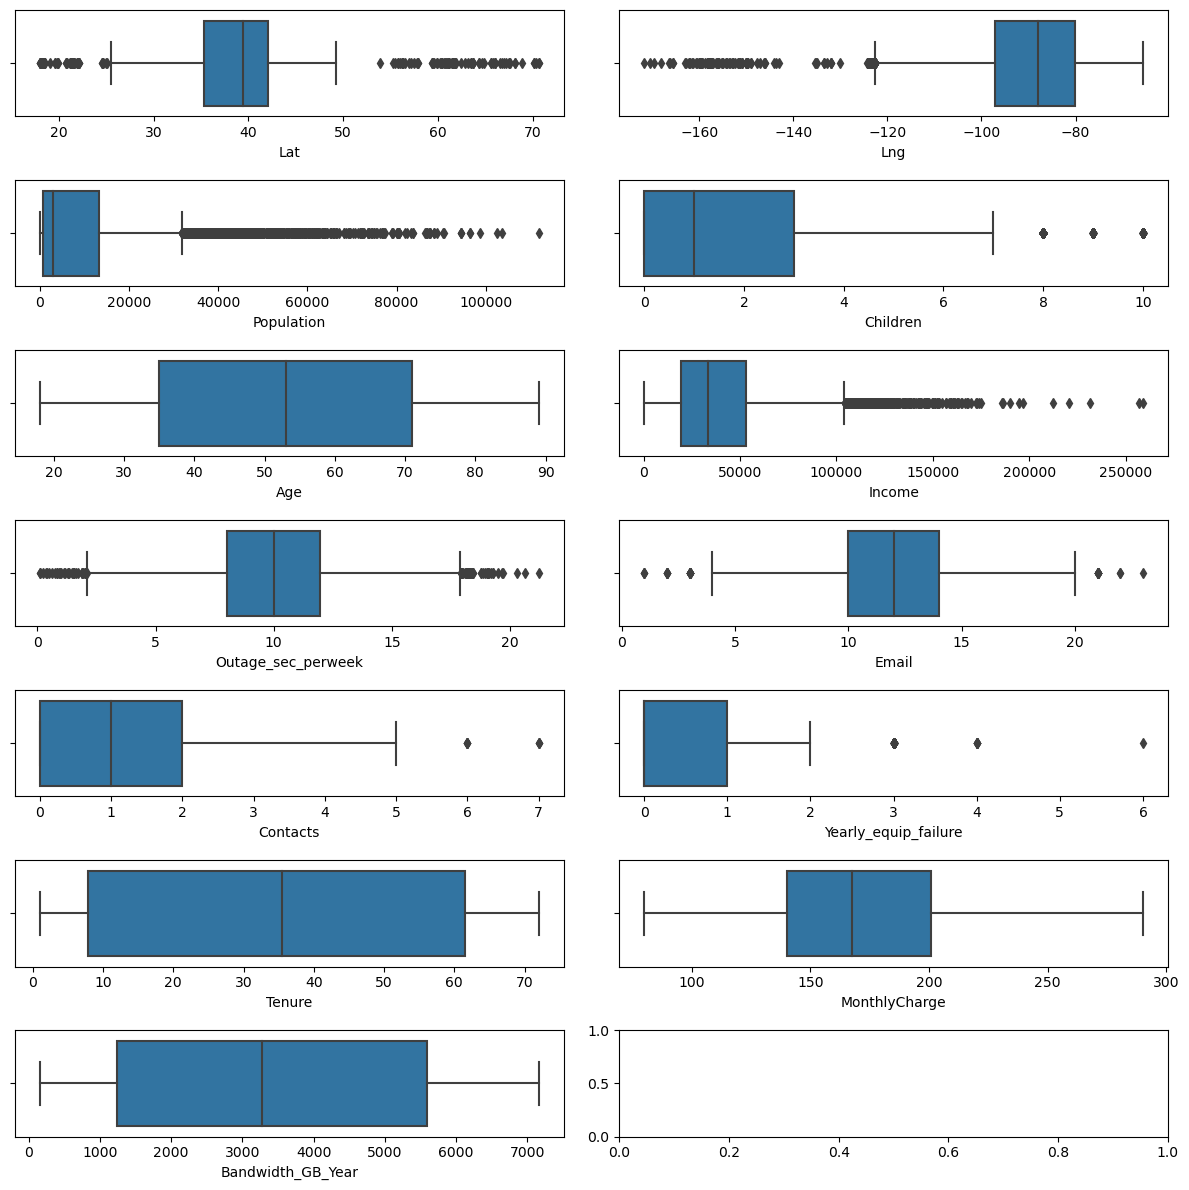

In [10]:
# Step 6: Identify and treat outliers

# Visually show outliers for each quantitative variable on respective box plots
# Import seaborn
import seaborn as sns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))

plt.subplot(7, 2, 1)
sns.boxplot(x='Lat', data = churn_data)

plt.subplot(7, 2, 2)
sns.boxplot(x='Lng', data = churn_data)

plt.subplot(7, 2, 3)
sns.boxplot(x='Population', data = churn_data)

plt.subplot(7, 2, 4)
sns.boxplot(x='Children', data = churn_data)

plt.subplot(7, 2, 5)
sns.boxplot(x='Age', data = churn_data)

plt.subplot(7, 2, 6)
sns.boxplot(x='Income', data = churn_data)

plt.subplot(7, 2, 7)
sns.boxplot(x='Outage_sec_perweek', data = churn_data)

plt.subplot(7, 2, 8)
sns.boxplot(x='Email', data = churn_data)

plt.subplot(7, 2, 9)
sns.boxplot(x='Contacts', data = churn_data)

plt.subplot(7, 2, 10)
sns.boxplot(x='Yearly_equip_failure', data = churn_data)

plt.subplot(7, 2, 11)
sns.boxplot(x='Tenure', data = churn_data)

plt.subplot(7, 2, 12)
sns.boxplot(x='MonthlyCharge', data = churn_data)

plt.subplot(7, 2, 13)
sns.boxplot(x='Bandwidth_GB_Year', data = churn_data)

plt.tight_layout()

After evaluation of each count and range of outliers for the variables, it was determined that none of the outliers should be removed, as each outlier is within an acceptable or justifiable range, implying that their input is valid and was not cause of mistake or human error. Below is the justification for retention of the data set’s outliers: 
* Lat & Lng: Customers are from all over the country, so these values may be accurate as customers are more densely populated in some areas. There are no latitudes or longitudes off on their own in the boxplot so there is no cause to question these values.
* Population: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Children: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Income: The maximum value is just over $250k, which is a reasonable income amount.
* Outage_sec_perweek: There are many outliers here which makes sense—there are likely some customers who experience little to no outages in the average week, making up the lower range of outliers. On the other hand, if one customer is experiencing an outage, those in a certain radius of them would likely also experience an outage, explaining the high number of upper-range outliers here too. This explains the wide range of outlier values here too.
* Email: The upper and lower range of outliers here does not present anything out of the question. 
* Contacts: The upper and lower range of outliers here does not present anything out of the question. 
* Yearly_equip_failure: The maximum number of times someone’s equipment failed this year is 6, which is unfortunate, but possible.

**C2.  Summary statistics**
<br> Summary statistics for the dependent variable, Churn, are below, as are summary statistics for each of the following independent variables: 
* Children
* Age 
* Gender 
* Outage_sec_perweek
* Yearly_equip_failure
* Techie
* Contract
* Tenure
* MonthlyCharge
* Bandwidth_GB_Year

* **Churn**: whether a customer has discontinued service within the past month (Yes / No)

In [71]:
print(churn_data['Churn'].describe())
print()
print(churn_data['Churn'].value_counts())

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

Churn
No     7350
Yes    2650
Name: count, dtype: int64


* **Children**: number of children residing in customer's household

In [72]:
print(churn_data['Children'].describe())
print()
print(churn_data['Children'].value_counts())

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
8      210
6      187
7      185
10      99
9       92
Name: count, dtype: int64


* **Age**: customer's age, in years

In [73]:
print(churn_data['Age'].describe())

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


* **Gender**: customer's self-reported gender (male, female, non-binary)

In [74]:
print(churn_data['Gender'].describe())
print()
print(churn_data['Gender'].value_counts())

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64


* **Outage_sec_perweek**: average number of seconds per week a system outage occurs in a customer's neighborhood

In [75]:
churn_data['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

* **Yearly_equip_failure**: number of times a customer's equipment failed or had to be replaced in the past year

In [76]:
churn_data['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

* **Techie**: whether a customer considers themselves technically inclined (Yes / No)

In [77]:
print(churn_data['Techie'].describe())
print()
print(churn_data['Techie'].value_counts())

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

Techie
No     8321
Yes    1679
Name: count, dtype: int64


* **Contract**: customer's contract term (month-to-month, one year, two year)

In [78]:
print(churn_data['Contract'].describe())
print()
print(churn_data['Contract'].value_counts())

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


* **Tenure**: length of time a customer has used the service, in months

In [79]:
print(churn_data['Tenure'].describe())

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


* **MonthlyCharge**: amount charged to customer monthly, in dollars

In [80]:
print(churn_data['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


* **Bandwidth_GB_Year**: average amount of data used, in GB, per year by the customer

In [81]:
churn_data['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

**C3. Visualizations**
<br> Univariate visualizations for the dependent variable and all independent variables are below. Additionally, bivariate visualizations are included which compare each independent variable to the dependent variable.

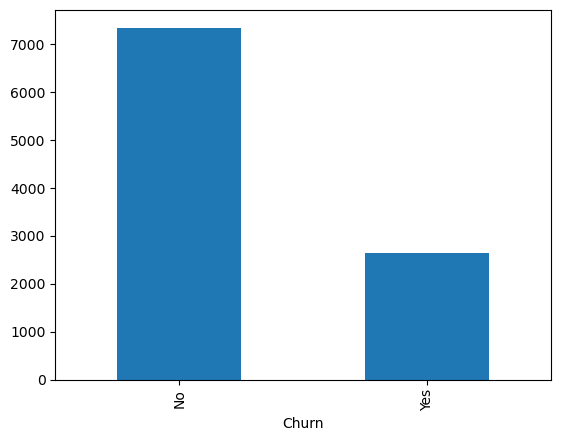

In [82]:
# Churn = DV
churn_data['Churn'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Children', ylabel='Churn'>

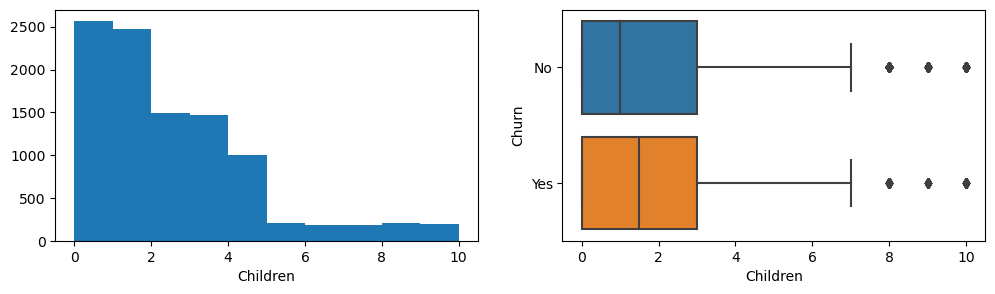

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Children'])
plt.xlabel('Children')

plt.subplot(1, 2, 2)
sns.boxplot(x='Children',y='Churn',data=churn_data)

<Axes: xlabel='Age', ylabel='Churn'>

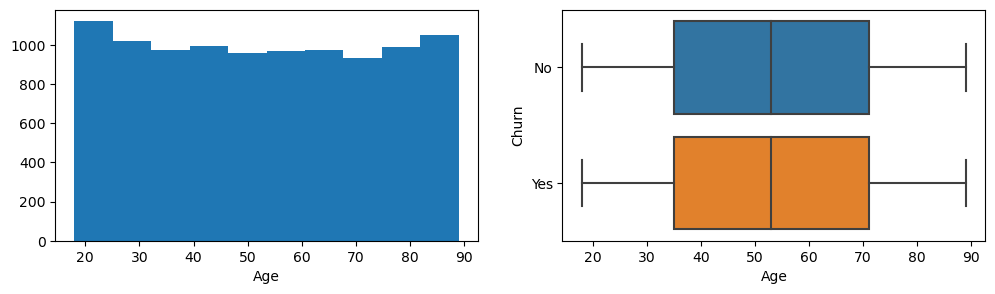

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Age'])
plt.xlabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Age',y='Churn',data=churn_data)

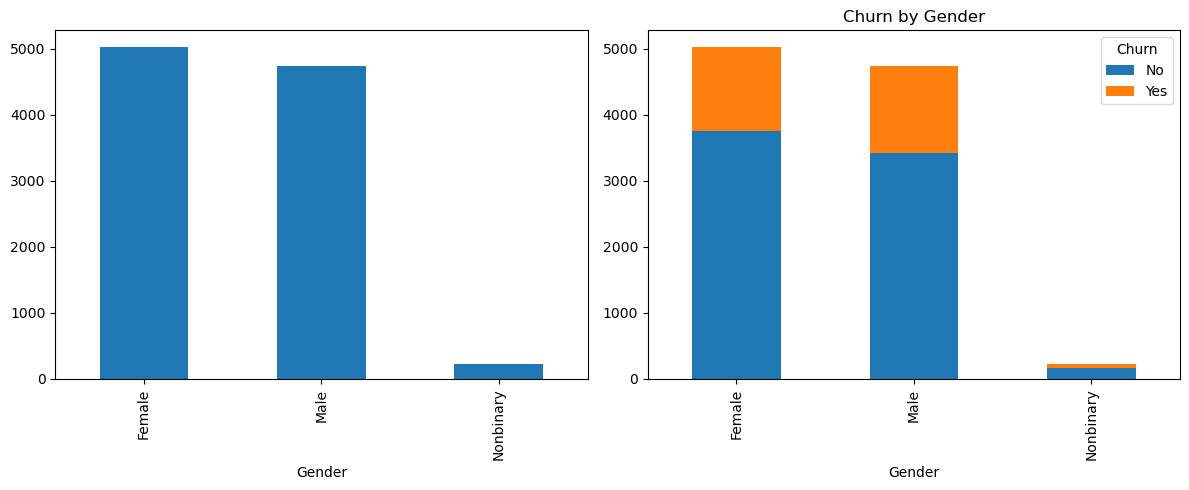

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

churn_data['Gender'].value_counts().plot(kind='bar', ax=axes[0])
plt.title('Gender Counts')

churn_gender_contingency = pd.crosstab(churn_data['Gender'], churn_data['Churn'])
churn_gender_contingency.plot(kind='bar', stacked=True, ax=axes[1])
plt.title('Churn by Gender')

plt.tight_layout()
plt.show()

<Axes: xlabel='Outage_sec_perweek', ylabel='Churn'>

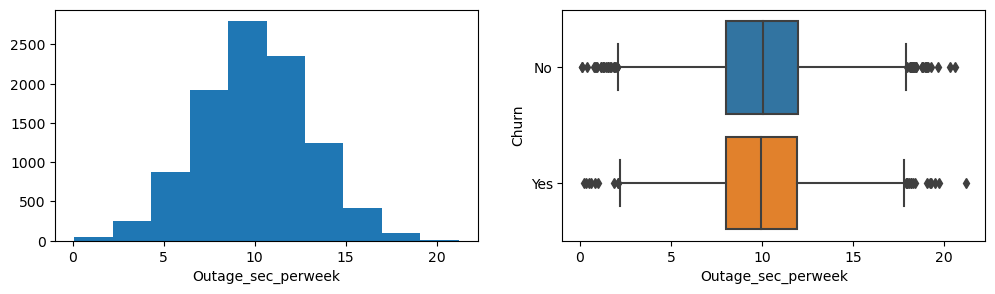

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Outage_sec_perweek'])
plt.xlabel('Outage_sec_perweek')

plt.subplot(1, 2, 2)
sns.boxplot(x='Outage_sec_perweek',y='Churn',data=churn_data)

<Axes: xlabel='Yearly_equip_failure', ylabel='Churn'>

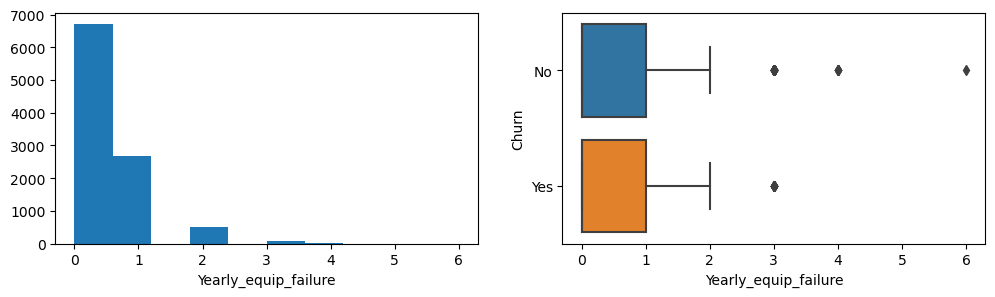

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Yearly_equip_failure'])
plt.xlabel('Yearly_equip_failure')

plt.subplot(1, 2, 2)
sns.boxplot(x='Yearly_equip_failure',y='Churn',data=churn_data)

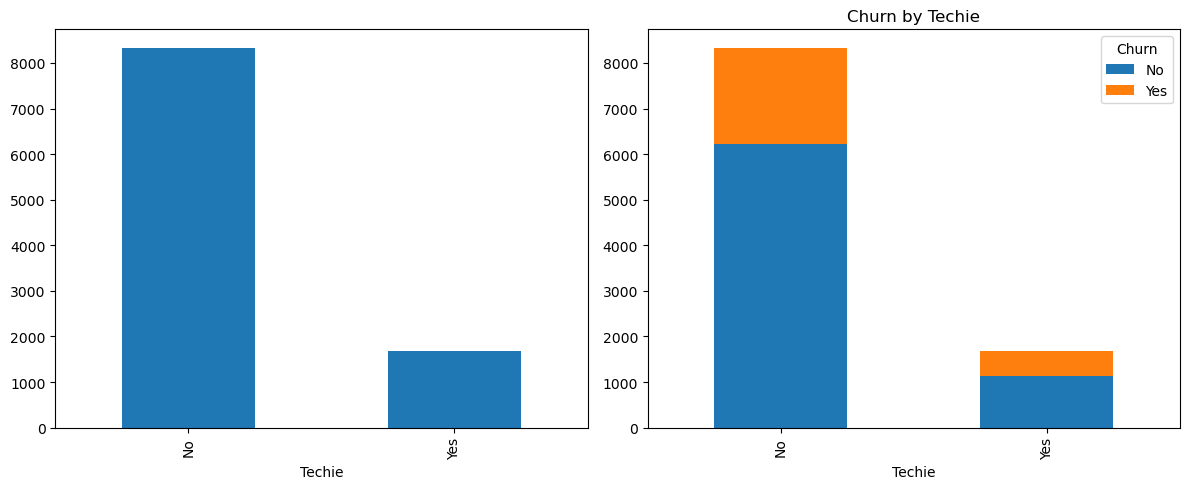

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

churn_data['Techie'].value_counts().plot(kind='bar', ax=axes[0])
plt.title('Techie Counts')

churn_gender_contingency = pd.crosstab(churn_data['Techie'], churn_data['Churn'])
churn_gender_contingency.plot(kind='bar', stacked=True, ax=axes[1])
plt.title('Churn by Techie')

plt.tight_layout()
plt.show()

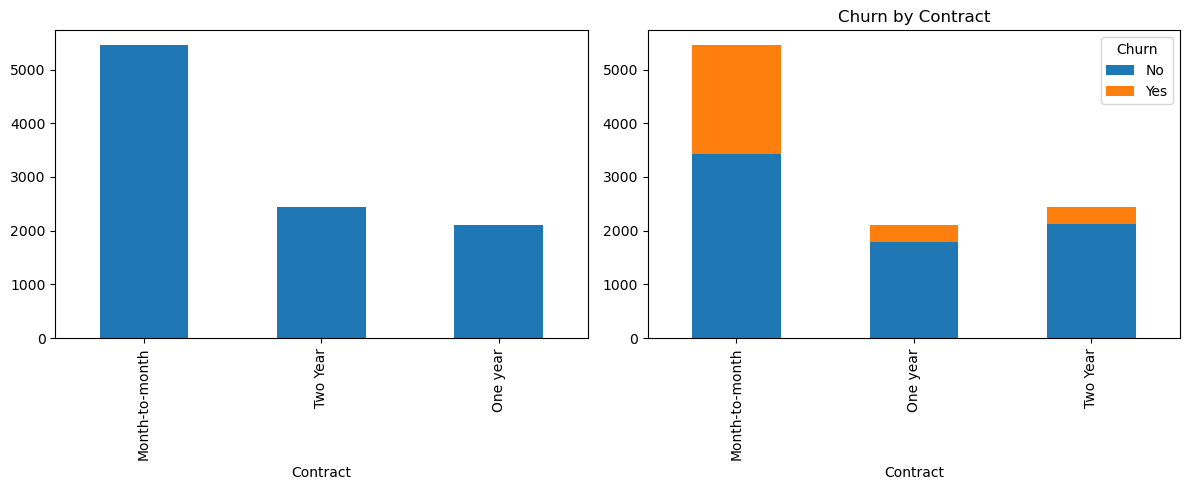

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

churn_data['Contract'].value_counts().plot(kind='bar', ax=axes[0])
plt.title('Contract Counts')

churn_gender_contingency = pd.crosstab(churn_data['Contract'], churn_data['Churn'])
churn_gender_contingency.plot(kind='bar', stacked=True, ax=axes[1])
plt.title('Churn by Contract')

plt.tight_layout()
plt.show()

<Axes: xlabel='Tenure', ylabel='Churn'>

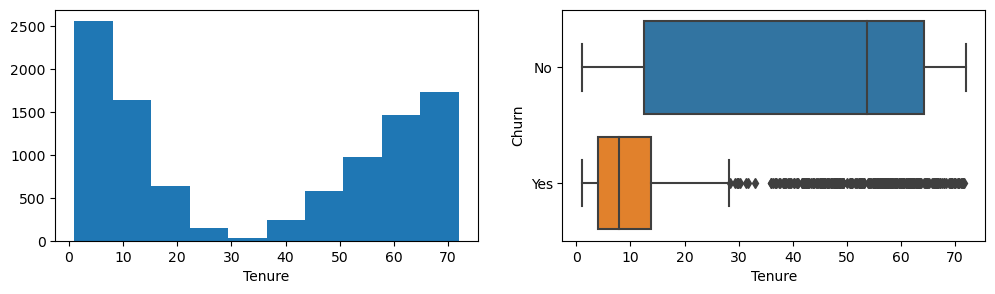

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Tenure'])
plt.xlabel('Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(x='Tenure',y='Churn',data=churn_data)

<Axes: xlabel='MonthlyCharge', ylabel='Churn'>

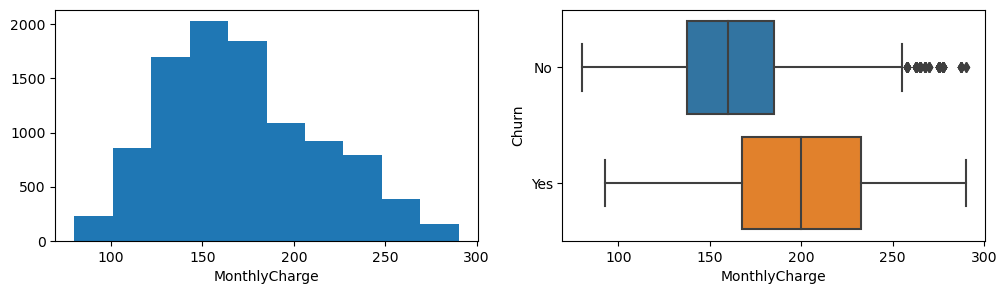

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['MonthlyCharge'])
plt.xlabel('MonthlyCharge')

plt.subplot(1, 2, 2)
sns.boxplot(x='MonthlyCharge',y='Churn',data=churn_data)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Churn'>

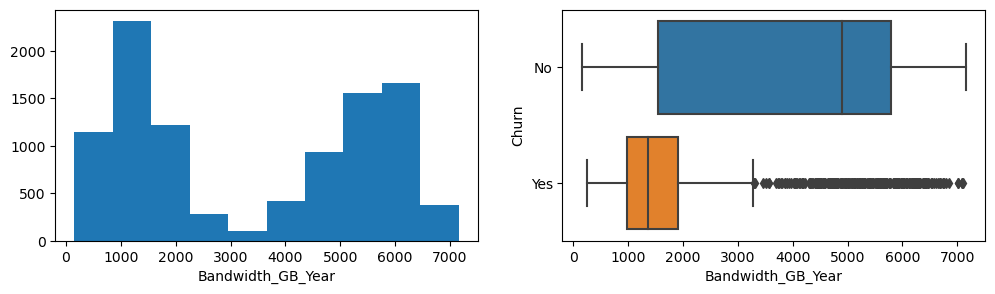

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(churn_data['Bandwidth_GB_Year'])
plt.xlabel('Bandwidth_GB_Year')

plt.subplot(1, 2, 2)
sns.boxplot(x='Bandwidth_GB_Year',y='Churn',data=churn_data)

**C4. Data transformation**
<br>Categorical variables were transformed into numerical variables to use for analysis in the code presented in section C1. These numerical variables are stored in separate columns so that the variables' original values were preserved for presentation of summary statistics and visualizations. Because of these transformations, dummy variables will not need to be encoded for creation of the model, as these variables are now prepared for use in the analysis.

**C5. Prepared data set**
<br>The prepared data set is downloadable via the code below.

In [222]:
churn_data.to_csv(r"C:/Users/psuik/Desktop/WGU/D208/churn_clean_D208p2.csv")

### Part IV: Model Comparison and Analysis

**D1. Initial model**
<br> To construct the initial logistic regression model, a new data frame was created containing only the dependent variable, and the selected independent variables.

In [93]:
df = churn_data[['Churn_num', 'Children', 'Age', 'Gender_num', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Techie_num', 'Contract_num', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].copy()
df.head()

,Churn_num,Children,Age,Gender_num,Outage_sec_perweek,Yearly_equip_failure,Techie_num,Contract_num,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,0,68,1,7.978323,1,0,1,6.795513,172.455519,904.536110
1,1,1,27,0,11.699080,1,1,0,1.156681,242.632554,800.982766
2,0,4,50,0,10.752800,1,1,2,15.754144,159.947583,2054.706961
3,0,1,48,1,14.913540,0,1,2,17.087227,119.956840,2164.579412
4,1,0,83,1,8.147417,1,0,0,1.670972,149.948316,271.493436


In [163]:
# Initial model
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Children', 'Age', 'Gender_num', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Techie_num', 'Contract_num', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
y = df[['Churn_num']]
y = y.values.ravel()

logreg = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X, y)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.246734
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.5733
Time:                        13:59:47   Log-Likelihood:                -2467.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.1074      0.018     -6.083      0.000      -0.142      -0.073

In [165]:
# Add a column of predicted values based on the initial model
df['Predictions'] = result.fittedvalues
df.head()

,Churn_num,Children,Age,Gender_num,Outage_sec_perweek,Yearly_equip_failure,Techie_num,Contract_num,Tenure,MonthlyCharge,Bandwidth_GB_Year,Predictions
0,0,0,68,1,7.978323,1,0,1,6.795513,172.455519,904.536110,-1.143296
1,1,1,27,0,11.699080,1,1,0,1.156681,242.632554,800.982766,5.290690
2,0,4,50,0,10.752800,1,1,2,15.754144,159.947583,2054.706961,-2.408260
3,0,1,48,1,14.913540,0,1,2,17.087227,119.956840,2164.579412,-3.595251
4,1,0,83,1,8.147417,1,0,0,1.670972,149.948316,271.493436,-0.213117


**D2. Justification of model reduction**
<br>The first step in reducing the model was to calculate the VIF, or variance inflation factor, for each explanatory variable, and remove any variable with a high VIF (VIF > 10), as this indicates multicollinearity between variables.

In [168]:
# First, define a function to calculate VIF: 
# (Keith, 2021)

def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    # Initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # Loop through each column (excluding 'const')
    for col in df.drop(columns=['const']):
        # Form input data for each exogenous variable
        y = df[col]
        X = df.drop(columns=[col])
    
        # Extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # Calculate VIF
        # Prevent division by zero runtime error
        if r_squared < 1: 
            vif = 1 / (1 - r_squared)
        else: 
            vif = 100
        vif_dict[col] = vif
    
        # Calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[col] = tolerance

    # Generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    
    return df_output.sort_values(by=['VIF'], ascending=False)

In [169]:
# Calculate VIF of x
vif(X)

,VIF,Tolerance
Bandwidth_GB_Year,93.153999,0.010735
Tenure,92.782498,0.010778
MonthlyCharge,1.385208,0.721913
Age,1.092790,0.915089
Children,1.086891,0.920055
Gender_num,1.018014,0.982304
Contract_num,1.001300,0.998702
Outage_sec_perweek,1.000807,0.999194
Yearly_equip_failure,1.000637,0.999363
Techie_num,1.000604,0.999397


In [217]:
# Bandwidth_GB_Year and Tenure both have VIF values over 10.
# Therefore they will be removed due to violation of multicollinearity.
#Re-running initial model with high-VIF variables removed:

X_no_vif = df[['Children', 'Age', 'Gender_num', 'Outage_sec_perweek', 'Yearly_equip_failure',
               'Techie_num', 'Contract_num', 'MonthlyCharge']].assign(const=1)
y = df[['Churn_num']]
y = y.values.ravel()

logreg = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X_no_vif, y)

logit_model = sm.Logit(y, X_no_vif)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.462085
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.2009
Time:                        15:21:16   Log-Likelihood:                -4620.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0063      0.012      0.524      0.600      -0.017       0.030

With high-VIF variables removed from the model, no multicollinearity exists among the variables. The next step in reducing the model is to perform forward stepwise variable selection. This method examines a set of candidate predictor variables and selects the one with the highest AUC when used in the model. Next, it selects the next best predictor variable from the list of candidates based on which has the highest AUC when used in conjunction with the previously selected variable. This process continues until the chosen nuumber of predictor variables have been selected (Nele Verbiest, n.d.).

With code adapted from DataCamp (Nele Verbiest, n.d.), a function will first be defined to calculate AUC. An additional function will be defined to find the next best variable with a function named "next_best". Once these two functions are set, the final step in forward stepwise variable selection can be completed. This final step reduces the variables down to just the top 5, from the originally selected 10 predictor variables in the initial model. The code below carries out this process.

In [193]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

# Define AUC function
def auc(variables, Churn_num, df):
    X = df[variables].assign(const=1)
    y = df[['Churn_num']]
    y = y.values.ravel()
    logreg = linear_model.LogisticRegression(max_iter=1000)
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, predictions)
    return auc

In [194]:
# Define next best function
def next_best(current_variables, candidate_variables, Churn_num, df):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], Churn_num, df)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable
current_variables = ["Children"]
candidate_variables = ['Age', 'Gender_num','Outage_sec_perweek', 'Yearly_equip_failure',
               'Techie_num', 'Contract_num', 'MonthlyCharge']
next_variable = next_best(current_variables, candidate_variables, df["Churn_num"], df)
print(next_variable)

MonthlyCharge


In [198]:
# Finally, perform forward stepwise variable selection:

candidate_variables = ['Children', 'Age', 'Gender_num','Outage_sec_perweek', 'Yearly_equip_failure',
               'Techie_num', 'Contract_num', 'MonthlyCharge']
current_variables = []
target = ['Churn_num']
max_number_variables = 5
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0, number_iterations):
    next_var = next_best(current_variables, candidate_variables, df['Churn_num'], df)
    current_variables = current_variables + [next_var]
    candidate_variables.remove(next_var)
print(current_variables)

['MonthlyCharge', 'Contract_num', 'Techie_num', 'Gender_num', 'Outage_sec_perweek']


The five variables returned above are determined to have the most impact on the dependent variable, Churn. These variables will be used as predictor variables when building the final model. 

**D3. Reduced logistic regression model**
<br> With the five most influential variables determined in section D2, above, the reduced model is created using these variables only. Once again, a new dataframe is created to work with these variables.

In [206]:
df_red = df[['MonthlyCharge', 'Contract_num', 'Techie_num', 'Gender_num', 'Outage_sec_perweek']].copy()
df_red.head()

,MonthlyCharge,Contract_num,Techie_num,Gender_num,Outage_sec_perweek
0,172.455519,1,0,1,7.978323
1,242.632554,0,1,0,11.699080
2,159.947583,2,1,0,10.752800
3,119.956840,2,1,1,14.913540
4,149.948316,0,0,1,8.147417


In [211]:
# Reduced model
from sklearn import linear_model
import statsmodels.api as sm

X = df_red[['MonthlyCharge', 'Contract_num', 'Techie_num', 'Gender_num', 'Outage_sec_perweek']].assign(const=1)
y = df[['Churn_num']]
y = y.values.ravel()

logreg = linear_model.LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(X, y)

logit_model = sm.Logit(y, X)
result_red = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.462197
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.2007
Time:                        14:46:31   Log-Likelihood:                -4622.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
MonthlyCharge          0.0236      0.001     35.806      0.000       0.022       0.025
Contr

In [212]:
# Add a column of predicted values based on the reduced model
df_red['Predictions'] = result_red.fittedvalues
df_red.head()

,MonthlyCharge,Contract_num,Techie_num,Gender_num,Outage_sec_perweek,Predictions
0,172.455519,1,0,1,7.978323,-1.665873
1,242.632554,0,1,0,11.699080,1.305504
2,159.947583,2,1,0,10.752800,-2.614092
3,119.956840,2,1,1,14.913540,-3.441780
4,149.948316,0,0,1,8.147417,-1.215063


**E1. Model comparison** 
<br>The LLR p-value, which is essentially a substitute for the p-value of the overall model, was determined to be 0.00 for both the initial model and the reduced model. This indicates that the regression model is statistically significant, or meaningful, as a p-value of 0.00 is indeed less than 0.05, the standard significance level used for determination of significance. Based on this model evaluation element, it can be stated that both of these models are statistically significant. This information will be used to help answer the original research question.

**E2. Output and calculations**
<br> The code used for this analysis is provided throughout the preceding sections of this paper, along with its corresponding output.

A confusion matrix for this model is created using the code below. A confusion matrix gives a visual representation of the correct and incorrect classifications (Massaron & Boschetti, 2016).

In [218]:
# Confusion matrix (Massaron & Boschetti, 2016)
y_orig = df[['Churn_num']]
y_pred_prob = result_red.predict()
y_pred = np.round(y_pred_prob)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

array([[6758,  592],
       [1672,  978]], dtype=int64)

This output indicates that the sum of correct classifications for this model is 7,736. The sum of incorrect calculations is 2,264.

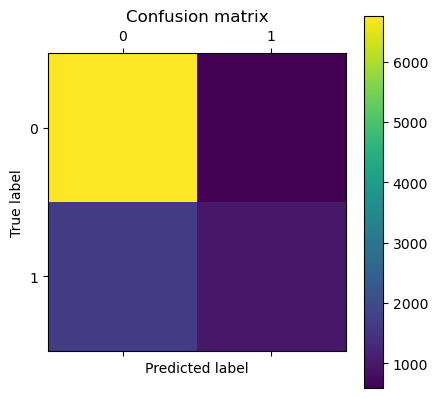

In [219]:
# Confusion matrix shown graphically, using a heatmap (Massaron & Boschetti, 2016)
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

An accuracy calculation for the model is included in the code below. The accuracy of a model is the percentage of correct classifications out of the total number of samples. In this case, the accuracy score is calculated with the "accuracy_score" import from SciKit Learn. This takes the inputs of the original y-values and the predicted y-values, which were calculated previously. 

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7736

Accuracy scores are values between 0 and 1, with 1 being perfect accuracy, and 0 being complete inaccuracy. The output above indicates that the accuracy score of this model is 0.7736, which aligns with the sum of correct classifications from the previous step, as this model is predicted to correctly classify 7,736 out of 10,000 values. 

**E3. Code**
<br> Code used for this analysis is written throughout the preceding sections.

### Part V: Data Summary and Implications

**F1. Results**
<br> To answer the research question posed in section A1 -- **What factors contribute to churn?** -- those factors are: **MonthlyCharge**, **Contract**, **Techie**, **Gender**, and **Outage_sec_perweek**. 

<br>The regression equation for the reduced model is as follows: 
<br> **Churn = 0.0236(MonthlyCharge) - 0.9835(Contract_num) - 0.4682(Techie_num) - 0.1295(Gender_num) - 0.0028(Outage_sec_perweek) - 4.8678** 

<br>Interpretation of the coefficients of the reduced model is done by calculating the odds ratios for each coefficient: 

In [223]:
# (Python for Data Science, n.d.)
model_odds = pd.DataFrame(np.exp(result_red.params), columns= ['Odds Ratio'])
model_odds

,Odds Ratio
MonthlyCharge,1.023928
Contract_num,0.374001
Techie_num,1.597073
Gender_num,1.138210
Outage_sec_perweek,0.997240
const,0.007690


* **Monthly charge**: For every $1 increase in monthly charge, the odds of churn increase by 2.39%.

* **Contract** *(0=month-to-month, 1=one year, 2=two year)*: As contract length increases, odds of churn decrease. For every increase in contract length (month-to-month to one-year, and one-year to two-year), odds of churn decrease by 63%.

* **Techie** *(0=No, 1=Yes)*: If a customer is a "Techie", their odds of churn increase by 59.70%.

* **Gender** *(0=Female, 1=Male, 2=Nonbinary)*: Odds of churn are higher for males than for females, and higher for nonbinary people than for males. Odds of churn are 13.8% higher for males than for females, and 13.8% higher for nonbinary people than males.

* **Outage_sec_perweek**: For every 1 second increase in outage seconds per week, odds of churn decrease by 1%.

* **Constant**: If all other values are zero, a customer's odds of churn are 0.77%.

As noted in section E1, the reduced model is found to be statistically significant, as the LLR p-value for the reduced model is below the threshold of 0.05, indicating significance of the model. 
<br><br> Before it can be determined if the reduced model is practically significant or not, the assumptions of logistic regression models must be verified.
<br> The assumption that the dependent variable is binary is met here, as "Churn" is a binary variable that contains Yes and No values. Upon visual inspection of the residual plot below, the assumption that all observations are independent of one another is not met, as the residual plot does not show a random pattern in the points (StatsNotebook, n.d.). The assumption of no multicollinearity is upheld in this model. As noted in section D2, the variables with high VIF values -- Bandwidth_GB_Year and Tenure -- were removed in the model reduction step. The remaining variables do not have high correlation, therefore this assumption is upheld. Finally, the assumption that independent variables and log odds are linear is not met, as visual inspection of the residual plot below shows that although a linear relationship is present, there are two lines instead of one, violating this assumption.

Text(0, 0.5, 'Residuals')

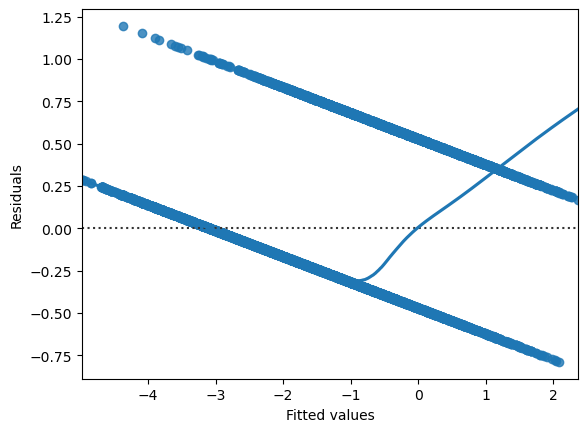

In [221]:
# Predicted values from x_reduced vs Churn_num
df_red = pd.concat([X_reduced['Predictions'], df['Churn_num']], axis=1)

sns.residplot(x="Predictions", y="Churn_num", data=df_red, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

An overarching limitation of regression models is that correlation does not equal causation. The model created here indicates which variables are most correlated with Churn, but it cannot be said that *because* a customer's monthly charge increases, then they are more likely to churn, or that *because* a customer signs a longer contract, then they are less likely to churn, etc. An additional limitation of this model is that the outliers for quantitative variables were left retained in the data cleaning process. There are outliers present in 'Outage_sec_perweek', a variable which is included in the final reduced model. Therefore, results could be impacted by the retention of these outliers.

**F2. Recommendations**
<br>Although the model is statistically significant, its lack of practical significance due to violations of two of the four assumptions means that viable recommendations for the business cannot be made based on this model. In order to reach a point of practical significance, it is recommended that additional explanatory variables be analyzed so that the assumptions of multiple logistic regression can be met, in order to get a more accurate answer as to which variables most meaningully contribute to a customer's churn probability.

### Part VI: Demonstration

**G. Panopto demonstration**
<br> A Panopto video demonstrating and explaining use of the code included here is included separately.

**H. Sources of third-party code**
<br> 
(2018, July 1). Logistic Regression Analysis. Harvard University Department of Sociology. Retrieved January 5, 2024, from https://sociology.fas.harvard.edu/files/sociology/files/logistic_regression_analysis.pdf

[Mark Keith]. (2021, October 11). Python: MLR/OLS assumptions normality multicollinearity VIF [Video]. YouTube. https://www.youtube.com/watch?v=9-M4SGzSx0k&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=11

(2023, November 8). Label Encoding in Python - 2024. Great Learning. Retrieved January 5, 2024, from https://www.mygreatlearning.com/blog/label-encoding-in-python/

Massaron, L., & Boschetti, A. (2016). Regression Analysis with Python. Packt Publishing.

[Nele Verbiest]. Introduction to Predictive Analytics in Python | Forward stepwise variable selection [Video]. DataCamp. https://campus.datacamp.com/courses/introduction-to-predictive-analytics-in-python/forward-stepwise-variable-selection-for-logistic-regression?ex=5

(n.d.). Logistic Regression. Python for Data Science. Retrieved January 5, 2024, from https://www.pythonfordatascience.org/logistic-regression-python/

**I. Sources** 

Massaron, L., & Boschetti, A. (2016). Regression Analysis with Python. Packt Publishing.

[Keiona Middleton]. (2023, August 10). D208 - Webinar: Getting Started with D208 Part I (November) [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

[Keiona Middleton]. (2023, August 10). D208 - Webinar: Getting Started with D208 Part II (November) [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

(2020, October 16). Residual plots and assumption checking. StatsNotebook. Retrieved January 6, 2024, from https://statsnotebook.io/blog/analysis/linearity_homoscedasticity/

Statistics Solutions (n.d.). Assumptions of Logistic Regression. Complete Dissertation. Retrieved January 2, 2024, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/